Import necessary libraries

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras 
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

Fetch the training and testing Data

Use glob

In [14]:
pwd   

'C:\\Users\\DHILSHANA SHIRIN\\Downloads\\cat and dog\\cat and dog'

In [15]:
import glob

In [16]:
cats=glob.glob('training_set/cats/*.jpg')
dogs=glob.glob('training_set/dogs/*.jpg')
cats_test=glob.glob('test_set/cats/*.jpg')
dogs_test=glob.glob('test_set/dogs/*.jpg')

In [17]:
cats

['training_set/cats\\cat.100.jpg',
 'training_set/cats\\cat.101.jpg',
 'training_set/cats\\cat.102.jpg',
 'training_set/cats\\cat.103.jpg',
 'training_set/cats\\cat.104.jpg',
 'training_set/cats\\cat.105.jpg',
 'training_set/cats\\cat.106.jpg',
 'training_set/cats\\cat.107.jpg',
 'training_set/cats\\cat.108.jpg',
 'training_set/cats\\cat.109.jpg',
 'training_set/cats\\cat.110.jpg',
 'training_set/cats\\cat.111.jpg',
 'training_set/cats\\cat.112.jpg',
 'training_set/cats\\cat.113.jpg',
 'training_set/cats\\cat.114.jpg',
 'training_set/cats\\cat.115.jpg',
 'training_set/cats\\cat.116.jpg',
 'training_set/cats\\cat.117.jpg',
 'training_set/cats\\cat.118.jpg',
 'training_set/cats\\cat.119.jpg',
 'training_set/cats\\cat.120.jpg',
 'training_set/cats\\cat.121.jpg',
 'training_set/cats\\cat.122.jpg',
 'training_set/cats\\cat.123.jpg',
 'training_set/cats\\cat.124.jpg',
 'training_set/cats\\cat.125.jpg',
 'training_set/cats\\cat.126.jpg',
 'training_set/cats\\cat.127.jpg',
 'training_set/cats\

Find the number of images in the Training and Testing set

In [19]:
print(f'Number of images in cats is {len(cats)}')
print(f'Number of images in dogs is {len(dogs)}')
print(f'Number of images in cats_test is {len(cats_test)}')
print(f'Number of images in dogs_test is {len(dogs_test)}')

Number of images in cats is 108
Number of images in dogs is 107
Number of images in cats_test is 38
Number of images in dogs_test is 56


Store all the images inside a list and create a list with the corresponding labels

For Training set

In [22]:
image = []
label = []
for i in cats:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
for i in dogs:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

For Testing set

In [67]:
image_test=[]
label_test=[]
for i in cats:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
for i in dogs:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

Shuffle both image list and label list (In both Training and testing set)

In [69]:
image, label = shuffle(image, label,random_state=100)

In [71]:
image_test, label_test = shuffle(image_test, label_test)

Plot a few images from our shuffled list with its corresponding label 

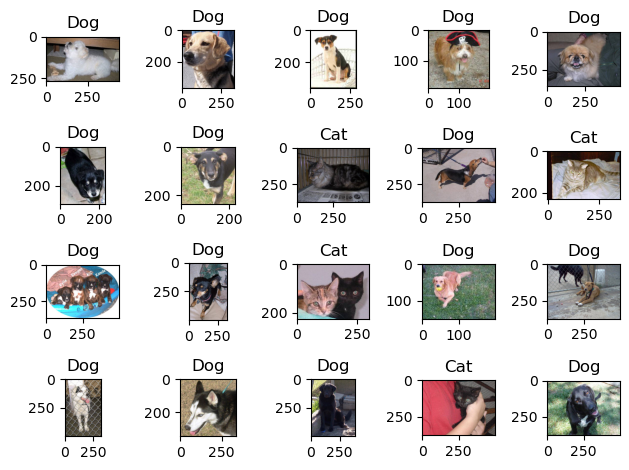

In [73]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('Dog')
    else:
        plt.title('Cat')
    plt.tight_layout()

Reshape the images both training and testing set

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [74]:
xtrain =[]
for i in image:
    xtrain.append(resize(i,(64,64,3)))
xtrain = np.array(xtrain)

In [75]:
xtest=[]
for i in image_test:
    xtest.append(resize(i,(64,64,3)))
xtest = np.array(xtest)

create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

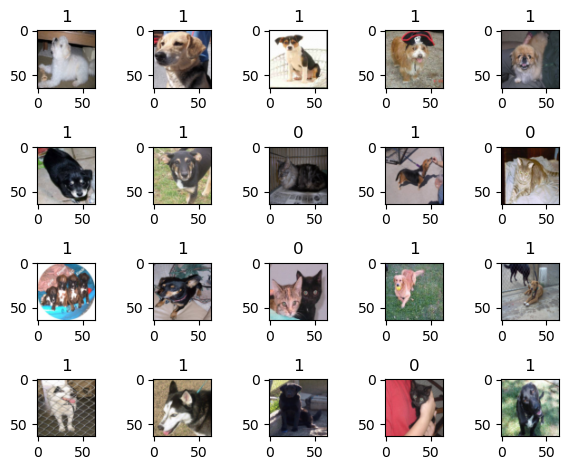

In [76]:
ytrain=np.array(label)
ytest=np.array(label_test)

for i in range (20):
    plt.subplot(4,5, i+1)
    plt.imshow(xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [77]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\DHILSHANA SHIRIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Check the summary of our model

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Train the model.

In [ ]:
model.fit(xtrain,ytrain,epochs=30, validation_split=0.1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6361 - loss: 0.5602 - val_accuracy: 0.5909 - val_loss: 0.7913
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8073 - loss: 0.4508 - val_accuracy: 0.5455 - val_loss: 0.8602
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8805 - loss: 0.3618 - val_accuracy: 0.2727 - val_loss: 1.5587
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7082 - loss: 0.5138 - val_accuracy: 0.5909 - val_loss: 0.7217
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8179 - loss: 0.3797 - val_accuracy: 0.3182 - val_loss: 1.1413
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9052 - loss: 0.3585 - val_accuracy: 0.5000 - val_loss: 0.9448
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8779 - loss: 0.3585 - val_accuracy: 0.3182 - val_loss: 1.1974
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8756 - loss: 0.3144 - val_accuracy: 0.5000 - val_loss: 1.0259


Make predictions with X_test

In [84]:
prediction= model.predict(xtest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [88]:
prediction =  list(map(lambda x:1 if x>.5 else 0,prediction))

Visualise confusion matrix 

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay

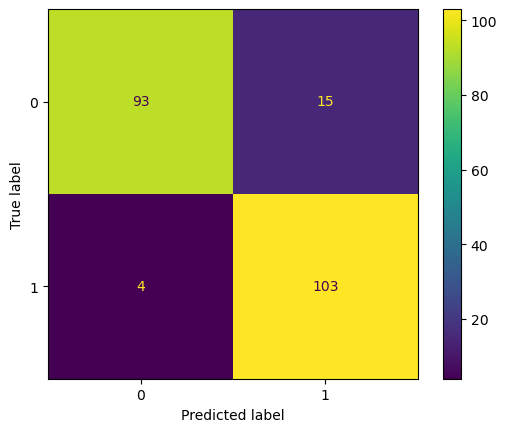

In [181]:
ConfusionMatrixDisplay.from_predictions(ytest,prediction)